In [1]:
def cool(ref1,ref2,mf1,mf2,out,in1,valin1,in2,valin2):
    import CoolProp.CoolProp as CP
    from CoolProp.CoolProp import PropsSI
    if ref2==0:
        k='HEOS::'+ref1
        g=CP.PropsSI(out,in1,valin1,in2,valin2,k)
        return g
    else:
        a=ref1+'&'+ref2
        b=CP.AbstractState('HEOS',a);b.set_mass_fractions([mf1,mf2])
        c=b.get_mole_fractions()
        k='HEOS::'+ref1+'['+'{}'.format(c[0])+']&'+ref2+'['+'{}'.format(c[1])+']'
        g=CP.PropsSI(out,in1,valin1,in2,valin2,k)
        return g

mt 23.17743695523348
mw 108.64506197399396
     quality    yan et al  Akers et al     shaha  Han et al  Kuo et al
0         0.00   6.677524     4.921842  2.476509   1.264849   2.480759
1         0.05   9.180737     6.415504  2.344444   1.403219  21.716160
2         0.10  10.936504     7.421669  2.207908   1.485625  26.540030
3         0.15  12.347265     8.210468  2.070820   1.545582  29.586506
4         0.20  13.550168     8.871136  1.933887   1.593154  31.711477
5         0.25  14.611077     9.445680  1.797474   1.632802  33.228775
6         0.30  15.567459     9.957642  1.661833   1.666912  34.291645
7         0.35  16.442957    10.421699  1.527169   1.696920  34.985732
8         0.40  17.253588    10.847693  1.393668   1.723760  35.361959
9         0.45  18.010776    11.242580  1.261515   1.748072  35.450618
10        0.50  18.722996    11.611484  1.130900   1.770320  35.268002
11        0.55  19.396734    11.958297  1.002030   1.790847  34.819492
12        0.60  20.037081    12.28

<ipython-input-2-95eaabcb01d0>:116: RuntimeWarning: divide by zero encountered in true_divide
  Co=(((1-x)/x)**.8)*((dgc/dlc)**.5)


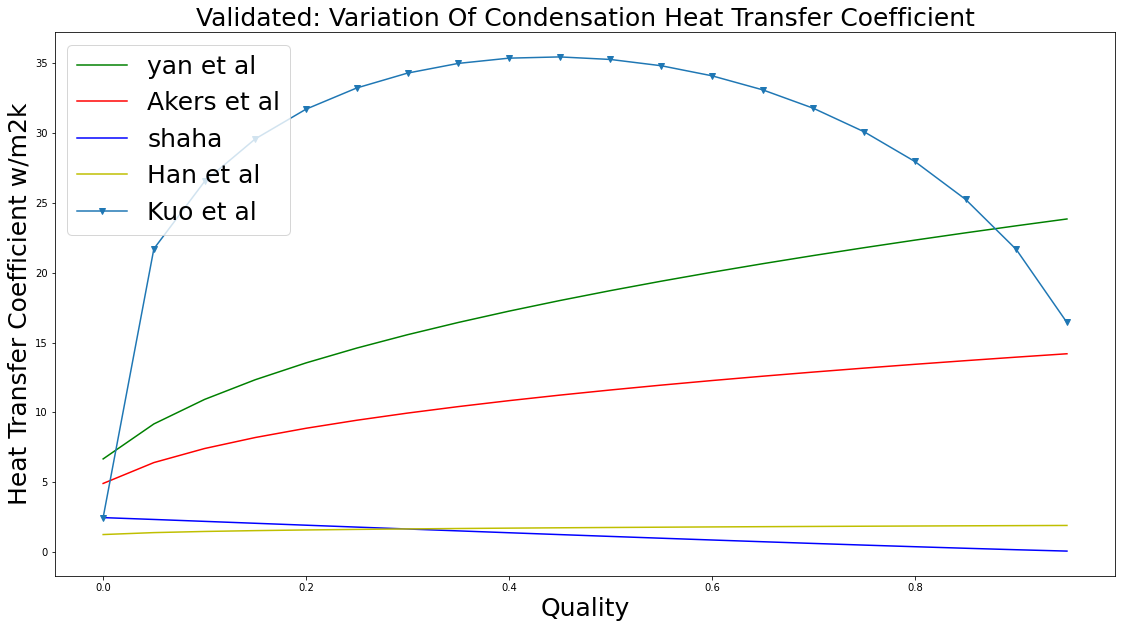

In [2]:
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from CoolProp.CoolProp import PropsSI
#input data
T1=543;T7=T8=463;P4=45000;T13=298;T11=T7+30;B=60;b=0.0022;pco=0.01325;we=0.55;g=9.81
#EXHAUST INPUTS
T9=587;mex=105.5;cex=1048.2;dex=0.59508;hex=593967;vex=.000030132;kex=0.045794
#MATERIAL PROPERTIES
t=0.0005;k=17
#COMMAN PARAMETER
X=(b*math.pi)/pco
si=(1/6)*(1+((1+X**2)**0.5)+4*(1+((X**2)/2))**0.5)
dh=(2*b)/si
deq=2*b
Gex=(mex)/(b*we)



#REQUIRED COMMAN PROPERTIES OF EVAPORATOR
cge=cool('Benzene',0,0,0,'C','T',T8,'Q',1)
cle=cool('Benzene',0,0,0,'C','T',T8,'Q',0)
kle=cool('Benzene',0,0,0,'L','T',T8,'Q',0)
kge=cool('Benzene',0,0,0,'L','T',T8,'Q',1)
vge=cool('Benzene',0,0,0,'V','T',T8,'Q',1)
vle=cool('Benzene',0,0,0,'V','T',T8,'Q',0)
prle=cool('Benzene',0,0,0,'Prandtl','T',T8,'Q',0)
prge=cool('Benzene',0,0,0,'Prandtl','T',T8,'Q',1)
dle=cool('Benzene',0,0,0,'D','T',T8,'Q',0)
dge=cool('Benzene',0,0,0,'D','T',T8,'Q',1)
s_tension=cool('Benzene',0,0,0,'I','T',T8,'Q',1)
hge=cool('Benzene',0,0,0,'H','T',T8,'Q',1)
hle=cool('Benzene',0,0,0,'H','T',T8,'Q',0)
LHE=hge-hle

#REQUIRED COMMAN PROPERTIES OF CONDENSER
cgc=cool('Benzene',0,0,0,'C','P',P4,'Q',1)
clc=cool('Benzene',0,0,0,'C','P',P4,'Q',0)
klc=cool('Benzene',0,0,0,'L','P',P4,'Q',0)
vgc=cool('Benzene',0,0,0,'V','P',P4,'Q',1)
vlc=cool('Benzene',0,0,0,'V','P',P4,'Q',0)
prlc=cool('Benzene',0,0,0,'Prandtl','P',P4,'Q',0)
dlc=cool('Benzene',0,0,0,'D','P',P4,'Q',0)
dgc=cool('Benzene',0,0,0,'D','P',P4,'Q',1)
hgc=cool('Benzene',0,0,0,'H','P',P4,'Q',1)
hlc=cool('Benzene',0,0,0,'H','P',P4,'Q',0)
LHC=hgc-hlc

#REQUIRED COMMAN PROPERTIES OF WATER
cw=cool('water',0,0,0,'C','P',101325,'T',T13)
kw=cool('water',0,0,0,'L','P',101325,'T',T13)
vw=cool('Benzene',0,0,0,'V','P',101325,'T',T13)
prw=cool('Benzene',0,0,0,'Prandtl','P',101325,'T',298)

#UNKNOWN TEMPRETURS ,PRESSURE & OTHER PROPERTIES
T4=cool('Benzene',0,0,0,'T','P',P4,'Q',0);T3=T4
T14=T3-10

P7=cool('Benzene',0,0,0,'P','T',T7,'Q',0)
S1=cool('Benzene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Benzene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Benzene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)


#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
print('mt',mt)
T12=T11-((mt*cle)/(mex*cex))*(T7-T6)
T10=((mt*LHE)/(mex*cex))+T11

#MASS FLOW RATE OF WATER
mw=(mt*LHC)/(cw*(T14-T13))
print('mw',mw)


#EQUIVALENT PROPERTIES FOR CONDENSER
x=0
for x in [np.arange(x,1,0.05)]:
    G=(mt)/(b*we)
    Geqc=G*((1-x)+x*((dlc/dgc)**0.5))
    Reeqc=(Geqc*dh)/vlc

#EQUIVALENT PROPERTIES OF EVAPORATER
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle

#CONDENSER HEAT TRANSFER COEFFICIENT CALCULATION
#1.yan et al
    hcon_Yan=(4.118*(klc/dh)*(Reeqc**0.4)*(prlc**0.333))*2.2/10000
    

#2.Akers et al
    hcon_Akers=(5.03*(klc/dh)*(Reeqc**0.333)*(prlc**0.333))*3/10000
    

#3.shaha 
    Rel=(G*dh*(1-x))/vlc
    hl=.023*(Rel**.8)*(prlc**.4)*(klc/dh)
    hcon_Shaha=(hl*(((1-x)**0.4)+((3.8*((x)**.76)*((1-x)**.04))/(P4**0.38))))/10000
    

#4.Han et al
    a=(math.pi)/180
    Ge1=11.22*((pco/dh)**-2.83)*(((pco/dh)-50*a)**-4.5)
    Ge2=0.35*((pco/dh)**0.23)*(((pco/dh)-50*a)**-1.48)
    hcond_Han=((Ge1*(klc/dh)*(Reeqc**Ge2)*prlc**0.333))/2
    
#5.Kuo et al 
    Co=(((1-x)/x)**.8)*((dgc/dlc)**.5)
    q=(mt*LHC)
    Bo=(q)/(G*LHC)
    Frlo=(G**2)/((dlc**2)*g*dh)
    hcond_Kuo=(0.2092*(klc/dh)*(Rel**0.78)*(prlc**0.333)*((klc/dh)**.14)*((0.25*(Co**-.45)*Frlo**0.25)+(75*(Bo**0.75))))*2/100000

    
    
    data={ ' quality  ': x,'yan et al':hcon_Yan,'Akers et al':hcon_Akers,'shaha':hcon_Shaha,'Han et al':hcond_Han,'Kuo et al':hcond_Kuo}
    df=pd.DataFrame(data=data)
    print(df)
    plt.figure(figsize=(19,10))
    plt.title('Validated: Variation Of Condensation Heat Transfer Coefficient',{'size':25})
    plt.xlabel('Quality',{'size':25})
    plt.ylabel('Heat Transfer Coefficient w/m2k',{'size':25})
    
    plt.plot(x,hcon_Yan,'g-',label='yan et al')
    plt.plot(x,hcon_Akers,'r-',label='Akers et al')
    plt.plot(x,hcon_Shaha,'b-',label='shaha')
    plt.plot(x,hcond_Han,'y-',label='Han et al')
    plt.plot(x,hcond_Kuo,'v-',label='Kuo et al')
    plt.legend(fontsize='25')

    print(Geqc)      






In [3]:
#AREA CALCULATION FOR CONDENSOR
#1. FIND HEAT TRANSFER COEFFICIENT FROM WATER SIDE
Gw=(mw)/(b*we)
Rew=(Gw*deq)/vw
h_water=(0.724*(kw/dh)*(((6*B)/math.pi)**0.646)*(Rew**0.583)*(prw**0.33))
print('h_water',h_water)

#2.Rate of Heat Transfer From Condenser
Q=mt*LHC
print('Q',Q)
#3.LMTD
LMTD=((T4-T13)-(T3-T14))/(math.log((T4-T13)/(T3-T14)))
print('LMTD',LMTD)
#4. OVERALL HEAT TRANSFER COEFFICIENT
U=((1/(hcond_Han*22000))+(1/h_water)+0.00045)**-1
print('U',U)
#5.Area
A_cond=(Q)/(U*LMTD)
print('A_cond',A_cond)

h_water 10826331.799360985
Q 9534922.582884764
LMTD 18.557071620613566
U [2057.4899905  2072.60153944 2080.34887081 2085.49831356 2089.32477973
 2092.35337944 2094.85030118 2096.96861239 2098.80419899 2100.42098313
 2101.8636467  2103.16461128 2104.34812427 2105.43277839 2106.43313291
 2107.36079451 2108.22516012 2109.03394073 2109.79353925 2110.50932855]
A_cond [249.72958544 247.9087816  246.98555593 246.37570745 245.92448592
 245.56851985 245.27581856 245.02804636 244.81374805 244.62530441
 244.45740007 244.30618489 244.16878389 244.04299565 243.92709854
 243.81972167 243.71975636 243.62629375 243.53857988 243.45598261]


     quality    kim et al  han et al  don & condlikar     Amalfi
0         0.00   9.505718   3.969351        32.351642  14.476801
1         0.05  10.206426   4.554009        32.567575  14.476801
2         0.10  10.846293   5.121666        32.605677  14.476801
3         0.15  11.437863   5.675027        32.631112  14.476801
4         0.20  11.989935   6.216099        32.650914  14.476801
5         0.25  12.508960   6.746423        32.667529  14.476801
6         0.30  12.999829   7.267219        32.682138  14.476801
7         0.35  13.466349   7.779472        32.695427  14.476801
8         0.40  13.911554   8.283996        32.707851  14.476801
9         0.45  14.337904   8.781471        32.719750  14.476801
10        0.50  14.747428   9.272477        32.731412  14.476801
11        0.55  15.141820   9.757509        32.743115  14.476801
12        0.60  15.522513  10.236997        32.755160  14.476801
13        0.65  15.890731  10.711320        32.767924  14.476801
14        0.70  16.247527

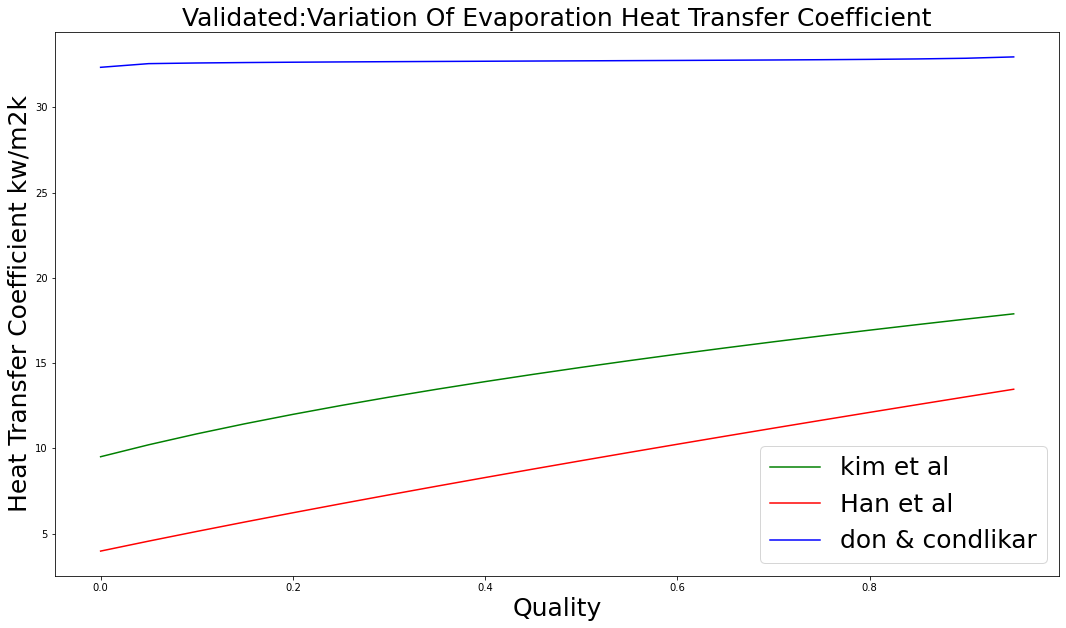

In [4]:
#EVAPORATER HEAT TRANSFER COEFFICIENT
#1.kim et al
hev_kim=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/5000
#2.Han et al
Ge1=2.81*((pco/dh)**-.041)*((pco/dh)**-2.83)
Ge2=0.746*((pco/dh)**-0.082)*((pco/dh)**0.61)
Q=(mt*LHE)
q=Q/(deq*we)
Boeq=(q)/(Geqe*LHE)
hev_Han=(Ge1*(kle/dh)*((Reeqe**(0.95*Ge2))*(Boeq**0.5)*(prle**0.4)))/25000000

#3.Donowski and kandlikar
q=(mt*LHE)/(b*we)
Bo=q/(G*LHE)
Relo=(G*dh)/vle
Nurlo=0.2875*(Relo**.78)*(prle**0.3)
hev_Don=((1.184*(Co**-.3)+225.5*(Bo**2.8))*(((1-x)**0.003)*(kle/dh)*Nurlo))/2100000


#4.Amalfi et al
Bd=((dle-dge)*g*dh**2)/(s_tension)
hev_Ampl=(18.495*(kle/dh)*((kle/dh)**0.248)*((kle/dh)**0.135)*((kle/dh)**0.351)*((kle/dh)**0.223)*((Bd)**0.235)*(Bo**0.198))/1000

data={ ' quality  ': x,'kim et al':hev_kim,'han et al':hev_Han,'don & condlikar':hev_Don,'Amalfi':hev_Ampl}
df=pd.DataFrame(data=data)
print(df)
plt.figure(figsize=(18,10))
plt.title('Validated:Variation Of Evaporation Heat Transfer Coefficient',{'size':25})
plt.xlabel('Quality',{'size':25})
plt.ylabel('Heat Transfer Coefficient kw/m2k',{'size':25})
    
    
plt.plot(x,hev_kim,'g-',label='kim et al')
plt.plot(x,hev_Han,'r-',label='Han et al')
plt.plot(x,hev_Don,'b-',label='don & condlikar')

plt.legend(fontsize='25')







In [5]:
#AREA OF EVAPORATER
#1. EXHAUST SIDE HEAT TRANSFER COEFFICIENT
x=0.1
prex=(vex*cex)/kex
Gex=(mex)/(b*we)
Reex=(Gex*deq)/vex
fex=(1.82*math.log(Reex)-1.64)**-2
Nuex=((fex/8)*Reex*prex)/((12.7*((fex/8)**0.5)*((prex**0.6777)-1))+1.07)
hex=(Nuex*kex)/deq

#OVERALL HEAT TRANSFER COEFFICIENT
U=((1/hex)+(1/(hev_Han*1000))+0.0008)**-1

#LMTD
LMTD=((T10-T8)-(T11-T7))/(math.log((T10-T8)/(T11-T7)))
print(LMTD)
#HEAT TRANSFER
Q=mt*LHE

#AREA
A_EVA=(Q)/(LMTD*U)

print(A_EVA)



55.29494465068807
[139.11286385 135.10842911 132.09519406 129.73806998 127.83908252
 126.27340314 124.95824434 123.83643529 122.86716615 122.02048991
 121.27391028 120.61018489 120.0158657  119.48030239 118.99494566
 118.55284974 118.14831048 117.77659773 117.43375439 117.11644346]


In [6]:
#AREA OF PREHEATER
##1 liquid side heat transfer coefficient
Rel=(G*deq)/vle
Tw=((T7+T6)+(T11+T12))/4
vw=cool('Benzene',0,0,0,'V','T',Tw,'Q',0)
Nul=(0.0154*B*a+0.1298)*(Rel**(0.1892*B*a+0.6398))*(prle**0.35)*((vle/vw)**0.14)
h_pre=(Nul*kle)/(deq*100)
##exhaust side heat transfer coefficient=hex

##overall heat transfer coefficient
U=((1/hex)+(1/h_pre)+0.00074)**-1
#heat transfer
Q=mex*cex*(T11-T12)

##LMTD
LMTD=((T11-T7)-(T12-T6))/(math.log((T11-T7)/(T12-T6)))

##AREA OF PREHEATER

A_PRE=(Q)/(U*LMTD)
print('A_PRE',A_PRE)


A_PRE 67.70094737144471


In [7]:
##Area of superheater
##HEAT TRANSFER COEFFICIENT  OF TOELENE
Tw=((T1+T8)+(T9+T10))/4
vw=cool('Benzene',0,0,0,'Prandtl','T',Tw,'P',P7)
Reg=(G*deq)/vge
Reex=(G*deq)/vge
f0=(1.8*math.log(Reg)-1.5)**-2
f1=39/(Reg**0.289)
p=math.sin(B*a)
q=(0.18*math.tan(B*a)+(0.36*math.sin(B*a))+(f0/p))**0.5
r=(1-p)/(3.8*f1)**.5
s=(p/q)+r
f=(1/s)**2
Nug=0.122*(prge**0.333)*((vge/vw)**(1/6))*(f*(Reg**2)*math.sin(2*B))**0.374
h_sup=(Nug*kge)/(deq*5)
## EXHAUST HEAT TRANSFER hex

##LMTD
LMTD=((T9-T1)-(T10-T8))/(math.log((T9-T1)/(T10-T8)))

#OVERALL HEAT TRANSFER COEFFICIENR
U=((1/h_sup)+(1/hex)+0.00071)**-1

##heat transfer 
Q=mex*cex*(T9-T10)

##AREA
A_SUP=Q/(U*LMTD)

print('A_SUP',A_SUP)


A_SUP 67.41270362642489


Area [67.70094737144471, 132.0951940590041, 67.41270362642489, 245.9244859232032]


<BarContainer object of 4 artists>

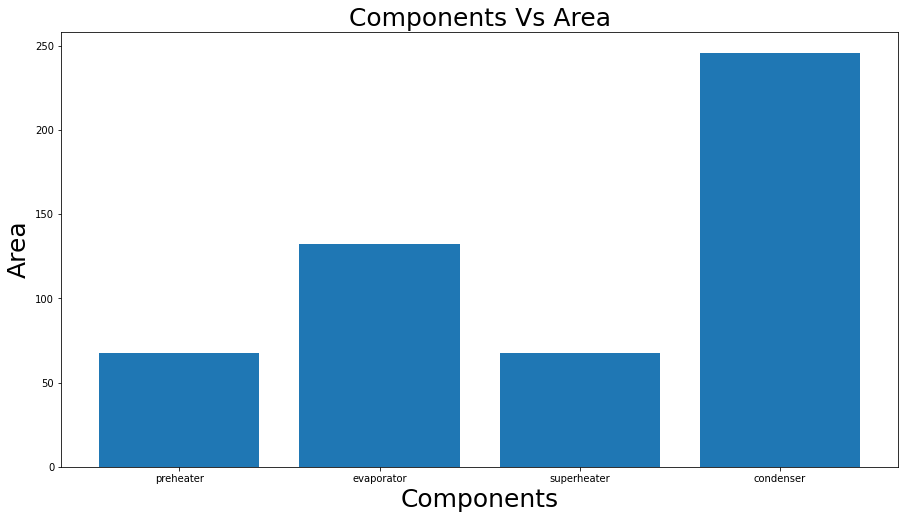

In [8]:
componant=['preheater','evaporator','superheater','condenser']
area=[A_PRE,A_EVA[2],A_SUP,A_cond[4]]
print("Area",area)
ypos=np.arange(len(componant))
plt.figure(figsize=(15,8))
plt.xlabel('Components',{'size':25})
plt.ylabel('Area',{'size':25})
plt.title('Components Vs Area',{'size':25})
plt.xticks(ypos,componant)
plt.bar(ypos,area)


     quality    Tsup=543K  Tsup=513K  Tsup=483K
0         0.00   9.505718   9.901789   9.699712
1         0.05  10.206426  10.631693  10.414720
2         0.10  10.846293  11.298222  11.067646
3         0.15  11.437863  11.914440  11.671288
4         0.20  11.989935  12.489515  12.234627
5         0.25  12.508960  13.030167  12.764245
6         0.30  12.999829  13.541488  13.265132
7         0.35  13.466349  14.027447  13.741172
8         0.40  13.911554  14.491202  14.195463
9         0.45  14.337904  14.935317  14.630514
10        0.50  14.747428  15.361904  15.048396
11        0.55  15.141820  15.772729  15.450837
12        0.60  15.522513  16.169285  15.839299
13        0.65  15.890731  16.552844  16.215031
14        0.70  16.247527  16.924507  16.579109
15        0.75  16.593818  17.285227  16.932468
16        0.80  16.930407  17.635840  17.275925
17        0.85  17.257999  17.977082  17.610203
18        0.90  17.577222  18.309606  17.935941
19        0.95  17.888633  18.633992  18

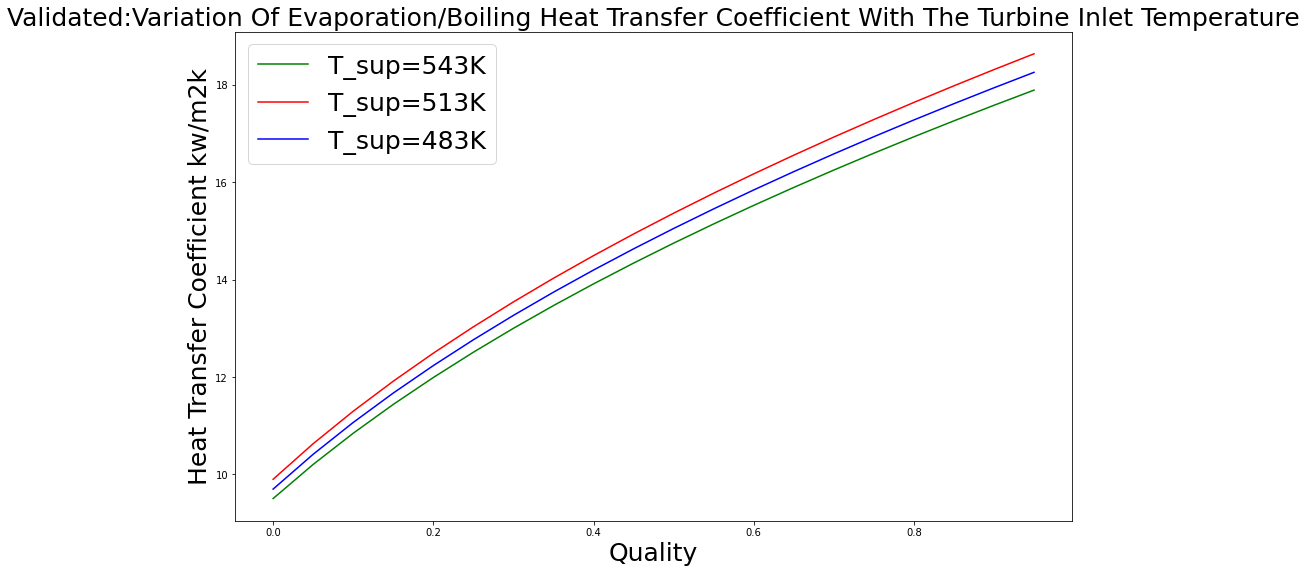

In [9]:
#EVAPORATER HEAT TRANSFER COEFFICIENT with variation in inlet turbine temperature
#1.kim et al Tsup=543K
T1=513
S1=cool('Benzene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Benzene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Benzene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/5000

#Tsup=513K
T1=513
S1=cool('Benzene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Benzene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Benzene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#print('mt',mt)
#T12=T11-((mt*cle)/(mex*cex))*(T7-T6)
#T10=((mt*LHE)/(mex*cex))+T11
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim2=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/4800

#Tsup=483K
T1=483
S1=cool('Benzene',0,0,0,'S','T',T1,'P',P7)
S2=S1
P2=P4
T2=cool('Benzene',0,0,0,'T','S',S1,'P',P2)
win=(1/dlc)*(P7-P4)
h5=hlc+win
T5=cool('Benzene',0,0,0,'T','H',h5,'P',P7)
T6=T5+(cge/cle)*(T2-T3)
#mass flow rate of touelene
mt=(mex*cex*(T9-T11))/(cge*(T1-T8)+LHE)
#EQUIVALENT PROPERTIES OF EVAPORATER
x=0
for x in [np.arange(x,1,0.05)]:
    Geqe=G*((1-x)+x*((dle/dge)**0.5))
    Reeqe=(Geqe*dh)/vle
hev_kim3=(5.323*(kle/dh)*(Reeqe**0.42)*(prle**0.333))/4900

data={ ' quality  ': x,'Tsup=543K':hev_kim,'Tsup=513K':hev_kim2,'Tsup=483K':hev_kim3}
df=pd.DataFrame(data=data)
print(df)
plt.figure(figsize=(15,9))
plt.title('Validated:Variation Of Evaporation/Boiling Heat Transfer Coefficient With The Turbine Inlet Temperature',{'size':25})
plt.xlabel('Quality',{'size':25})
plt.ylabel('Heat Transfer Coefficient kw/m2k',{'size':25})
    
plt.plot(x,hev_kim,'g-',label='T_sup=543K')
plt.plot(x,hev_kim2,'r-',label='T_sup=513K')
plt.plot(x,hev_kim3,'b-',label='T_sup=483K')

plt.legend(fontsize='25')


[9.202371488110497, 7.851207092570746, 6.846020622136197]


(1.0, 16.0)

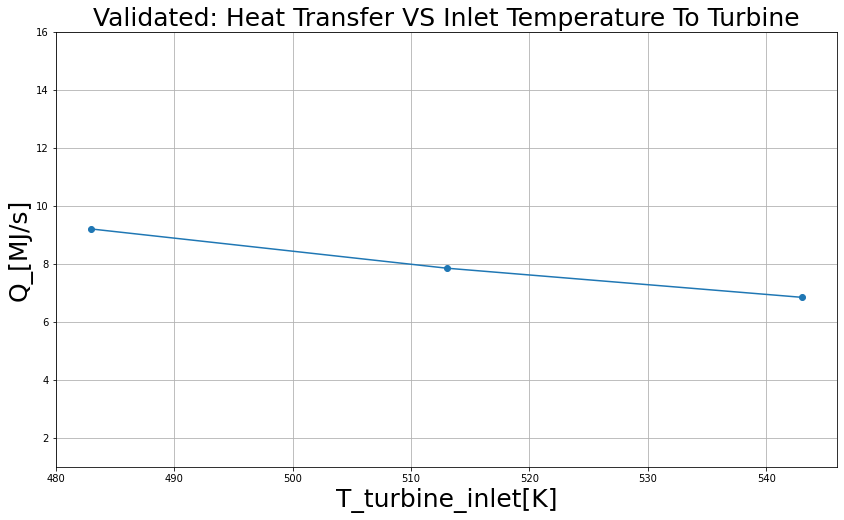

In [10]:
#Variation of Heat flux in Evaporator with turbine inlet temperature

hf=PropsSI("H","T",T7,"Q",0,"Benzene")
hg=PropsSI("H","T",T7,"Q",1,"Benzene")
hfg_evap=hg-hf
T1=[483,513,543]
M=[]
Q=[]
for i in [0,1,2]:
    m_b=(mex*cex*(T9-T11))/(cge*(T1[i]-T8)+hfg_evap)
    M.append(m_b)
    Q_evap=M[i]*hfg_evap/10e5
    Q.append(Q_evap)
print(Q)
plt.figure(figsize=(14,8))
plt.title('Validated: Heat Transfer VS Inlet Temperature To Turbine',{'size':25})
plt.plot(T1,Q,marker = 'o')
plt.ylabel('Q_[MJ/s]',{'size':25})
plt.xlabel('T_turbine_inlet[K]',{'size':25})
plt.grid(True)
plt.ylim((1,16))